# R syntax in a nutshell – Part V Programming in R
* 3.1 Input and output
* 3.2 Conditional execution
* 3.3 Loops
* 3.4 User-defined functions
* 3.5 An alternative to loops – *sapply*

## 3.1	Input and output
##### print(x)
Prints the contents of an object `x`, nicely formatted.
#### cat(…, file = "", sep = "")
This function displays the contents of one or more R objects in a less sophisticated way, but enabling much more control over the output format. 

**NB** that this function does not append a newline character that must be added explicitly to the output string as `"\n"`.

In [19]:
x <- 5.8
cat("The result is",x,"N/m.\n",sep="***")

The result is***5.8***N/m.


#### readline(prompt)
Displays the prompt and then reads input from the keyboard:
```R
> x <- readline("Enter x:\n")
Enter x:
> 5.8
> x
[1] "5.8"
```
This example shows that keyboard input is always in the form of a character vector of length 1. If required it has to be coerced to a numeric value using the function `as.numeric`:
```R
> x <- as.numeric(x)
> x
[1] 5.8
```

## 3.2	Conditional execution
<img src="images/execution.png" style="float:right;width:124px;">

Conditional execution of R code can be achieved using: 
#### if(*condition*) *expression1* else *expression2*
If `condition` evaluates to `TRUE`, `expression1` is executed, otherwise `expression2` is run. 
Complicated commands may be grouped together in braces:

In [20]:
x <- 3
y <- 0.5
if(x>2 & y<1){
    print(x)
    print(y)
}else{
    cat("Warning, x<=2 or y>=1!\n")
}

[1] 3
[1] 0.5


## 3.3	Loops
Sometimes it is useful to run some chunk of code repetitively in a loop. 
Due to the powerful indexing in R, loops are needed considerably less often than in any 
conventional programming language. They can be built using the statement: 
#### for(*variable* in *expression1*) *expression2*
`expression2` is a chunk of R code, usually grouped in braces to be executed once for each 
of the values of the control `variable`. The range of possible values for the variable is 
specified by a vector, `expression1`. 
    
See the example, which calculates and prints the square roots of the sequence of numbers 1, 3, 5, 7, and 9:

In [21]:
for(f in seq(1,10,by=2)){
    cat("Square root of",f,"is",sqrt(f),"\n")
} 

Square root of 1 is 1 
Square root of 3 is 1.732051 
Square root of 5 is 2.236068 
Square root of 7 is 2.645751 
Square root of 9 is 3 


<img src="images/warning-icon.png" style="float:left;width:32px;height:32px;">
Try to avoid loops if possible. Their execution in R tends to be time consuming and there are, usually, other alternatives.  For instance here, thanks to the recycling rules in R, we can write:

In [22]:
x <- seq(1,10,by=2)
ee <- paste("Square root of",x,"is",round(sqrt(x),6))
print(ee)

[1] "Square root of 1 is 1"        "Square root of 3 is 1.732051"
[3] "Square root of 5 is 2.236068" "Square root of 7 is 2.645751"
[5] "Square root of 9 is 3"       


Commands `apply`, `tapply` or `sapply` (below) are commonly a better approach.

#### while(*condition*) *expression*
In this case, `expression` will be executed as long as the `condition` remains valid (i.e. is `TRUE`).
#### repeat *expression*
This command is used in conjunction with a `break` statement 
(this is not a function and thus no brackets are required). 
In fact, the `break` statement can be used to terminate any loop, if necessary. 
The `next` statement can be invoked to discontinue one particular cycle and skip to the next one.

## 3.4	User-defined functions
User-defined functions provide a stylish way of extending the set of the available commands. In fact, much of the R itself is written in R! The function definition looks like: 
#### function.name <– function(*argument1*, *argument2*, …) *expression*
The `expression` is a chunk of R code, usually grouped in braces. In order to avoid confusion, the last statement should be `return(z)`, where `z` is an expression or variable name giving the value(s) to be returned by the function.If more values need to be returned, they can be assembled into a list object.
For example, we can write a user-defined function calculating a geometric mean, defined as the nth root of the product of `n` numbers, and use it on some data:
$$S=\sqrt[n]{\prod\limits_{i=1}^{n}{{{x}_{i}}}}$$

In [23]:
geo.mean <- function(x){
        out <- prod(x)^(1/length(x))
        return(out)
}
sazava  <-  read.table("data/sazava.data",sep="\t")
print(geo.mean(sazava[,"SiO2"]))


[1] 57.49363


### 3.4.1	Arguments to functions
There are two possibilities for providing arguments to a R function. First, you can pass them in the order matching the function’s definition. The second is to supply the arguments in the form `argument.name = value` in an arbitrary sequence. 
When writing a user-defined function, one can provide default values as in the following example:

In [24]:
options(repr.plot.width=10, repr.plot.height=10)     # Setting the size of output in Jupyter notebook
options(jupyter.plot_mimetypes = "image/png")        # Change mimetype to PNG

# Using image/svg+xml
# May not work in some browsers (but is optimal for Chrome, Firefox...)
options(repr.plot.width=5, repr.plot.height=5)
options(jupyter.plot_mimetypes = "image/svg+xml")  

In [25]:
my.plot <- function(x,y,symb="+",colour="red",cex=2){
    plot(x,y,pch=symb,col=colour,cex=cex)
}

And such a function then can be called in a number of ways, for instance:

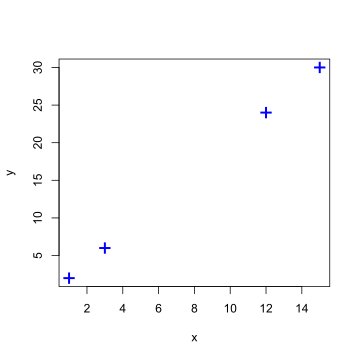

In [26]:
x.coord<-c(1,12,15,3)
y.coord<-c(2,24,30,6)
my.plot(x.coord,y.coord,colour="blue")  

But it is also obvious that: 
```R
my.plot(x.coord,y.coord,"blue") 
```
will not work as intended because the third parameter will be interpreted as parameter `symb`, i.e. a plotting character and a red ‘b’ will be plotted.

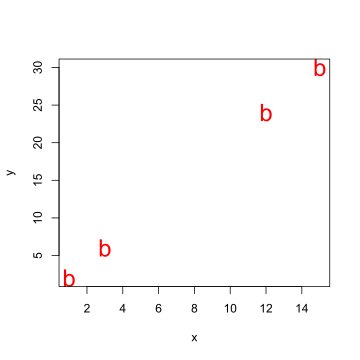

In [27]:
my.plot(x.coord,y.coord,"blue") 

Note that in R, most of the arguments to the functions have been given sensible defaults appropriate to most of the applications. Thus the ordinary user does not need to specify all of them, or to even be aware of their existence.
##### args(fun.name)
Displays the arguments to an existing function specified by fun.name, e.g.:

In [28]:
args("my.plot")

function (x, y, symb = "+", colour = "red", cex = 2) 
NULL

### 3.4.2	Assignments in functions
Importantly, the variables used within a user-defined function (in the example of the function calculating a geometric mean these were `x` and `z`) are local (in R jargon, limited to the function’s environment). This means that any assignments done within the function are temporary, being lost after the evaluation is done. Therefore, such assignments do not affect the value of the variable with the same name in the calling environment. 

[1] 12.5556

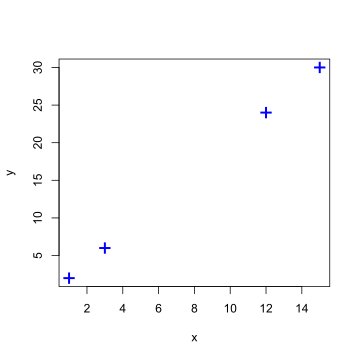

In [29]:
out<-12.5556
my.plot <- function(x,y,symb="+",colour="red",cex=2){
    plot(x,y,pch=symb,col=colour,cex=cex)
    out<-"text assigned within the body of function definition"
}
my.plot(x.coord,y.coord,colour="blue") 
out

In (rare) cases when it is desirable to alter the value of a variable globally (in the `.GlobalEnv` environment), this can be done with the “super assignment”:
```R
x <<- "Hello"
```

## 3.5	An alternative to loops – *sapply*
If loop-like execution of code seems unavoidable, often a most time-efficient solution can be made using functions such as `apply`, `tapply` or `sapply`.
#### sapply(x, FUN)
Applies a function `FUN` over a vector `x`. This means, that the function is run once for each of the values in the vector `x`. An example (the same as given for for loops, but quicker and more compact):

In [30]:
i <- seq(1,10,by=2)
ee <- sapply(i,sqrt)
print(paste("Square root of ",i," is ",round(ee,6)))

[1] "Square root of  1  is  1"        "Square root of  3  is  1.732051"
[3] "Square root of  5  is  2.236068" "Square root of  7  is  2.645751"
[5] "Square root of  9  is  3"       


Of course, the function `FUN` can also be a user-defined one.
### Anonymous functions
A strategy, often employed in R, is to use an anonymous function. So called, as it is not named and not visible outside the `sapply` statement:

In [31]:
ee <- sapply(seq(1,10,by=2),function(j){
    z <- paste("Square root of ",j," is ",round(sqrt(j),6))
    return(z)
})
print(ee)

[1] "Square root of  1  is  1"        "Square root of  3  is  1.732051"
[3] "Square root of  5  is  2.236068" "Square root of  7  is  2.645751"
[5] "Square root of  9  is  3"       
